In [18]:
import os
from pathlib import Path

from dotenv import load_dotenv
from openparse import DocumentParser, processing, Pdf
from markdownify import markdownify as md
from IPython.display import display, Markdown

In [2]:
load_dotenv()

OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [5]:
doc_path = "../docs/rms-dataset-documentation-nsw-traffic-volume-counts_0.pdf"
assert (Path.cwd() / doc_path).exists()

In [6]:
semantic_pipeline = processing.SemanticIngestionPipeline(
    openai_api_key=OPENAI_API_KEY,
    model="text-embedding-3-large",
    min_tokens=64,
    max_tokens=1024,
)

In [7]:
parser = DocumentParser(
    processing_pipeline=semantic_pipeline,
    table_args={
        "parsing_algorithm": "unitable",
        "min_table_confidence": 0.8,
    },
)
parsed_content = parser.parse(doc_path)
for node in parsed_content.nodes:
    print(node)

config.json:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Finished loading models. Ready for inference.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


elements=(TextElement(text='**3.2. How is data collected?**', lines=(LineElement(bbox=(42.5, 371.7, 200.21, 382.74), spans=(TextSpan(text='3.2. How is data collected? ', is_bold=True, is_italic=False, size=11.04),), style=None, text='**3.2. How is data collected?**'),), bbox=Bbox(page=0, page_height=841.92, page_width=595.2, x0=42.5, y0=371.7, x1=200.21, y1=382.74), variant=<NodeVariant.TEXT: 'text'>, embed_text='**3.2. How is data collected?**'), TextElement(text='Traffic volume information is collected via permanent and sample roadside traffic collection devices. ', lines=(LineElement(bbox=(42.5, 353.9, 485.66, 363.98), spans=(TextSpan(text='Traffic volume information is collected via permanent and sample roadside traffic collection devices. ', is_bold=False, is_italic=False, size=10.08),), style=None, text='Traffic volume information is collected via permanent and sample roadside traffic collection devices. '),), bbox=Bbox(page=0, page_height=841.92, page_width=595.2, x0=42.5, y0=35

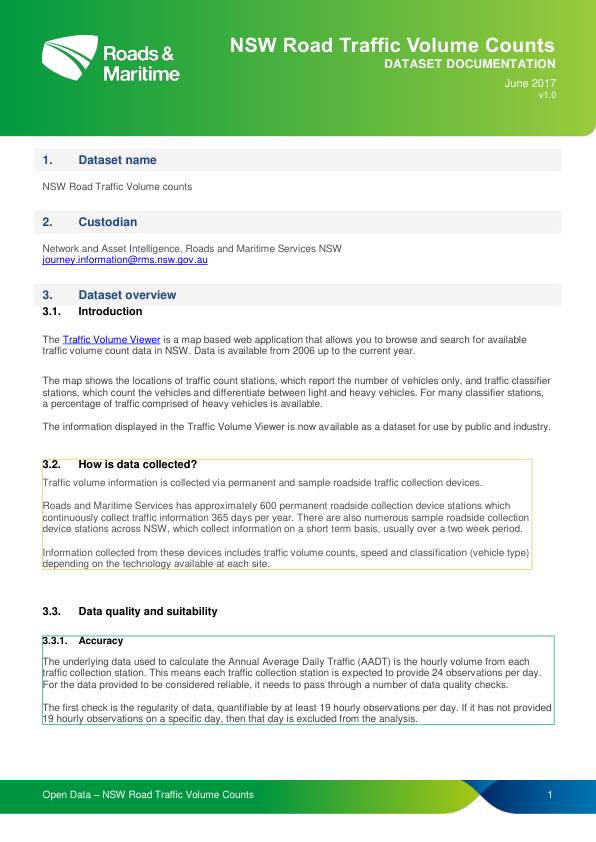

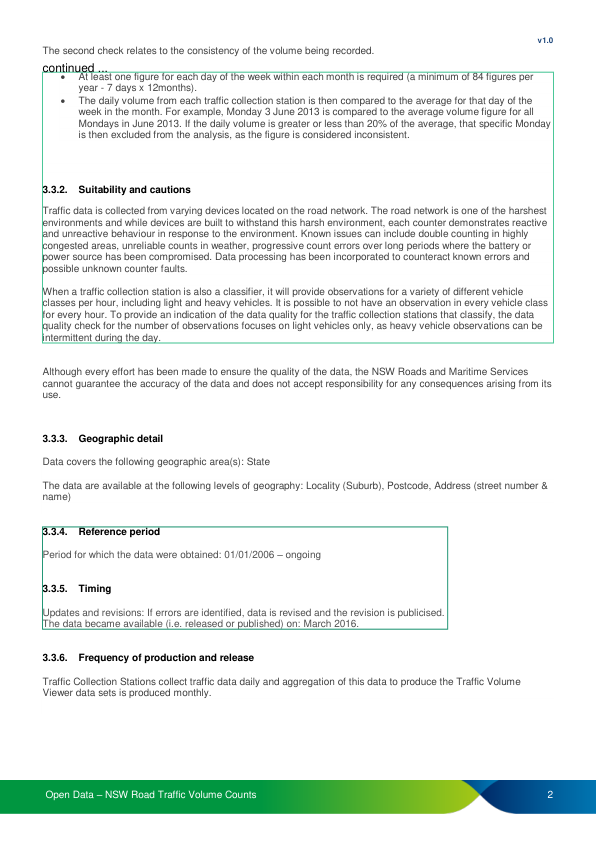

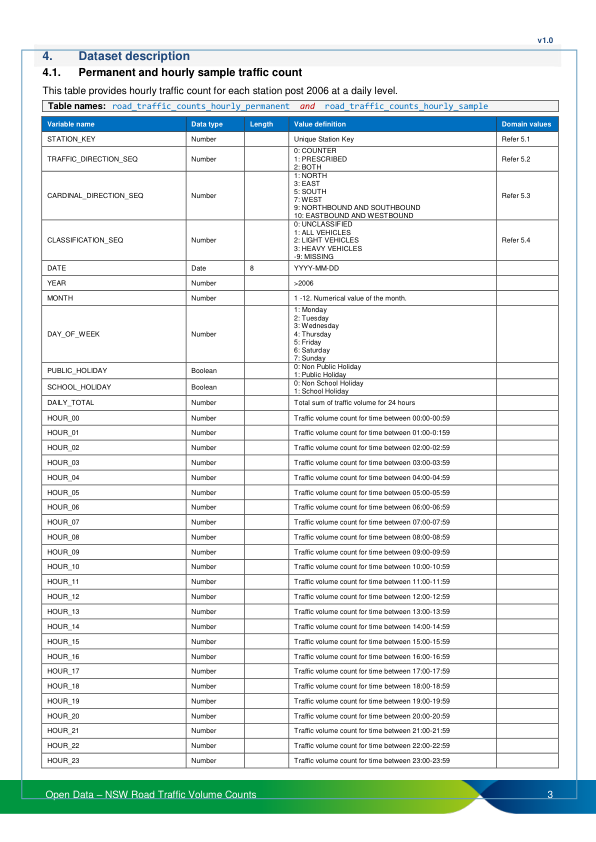

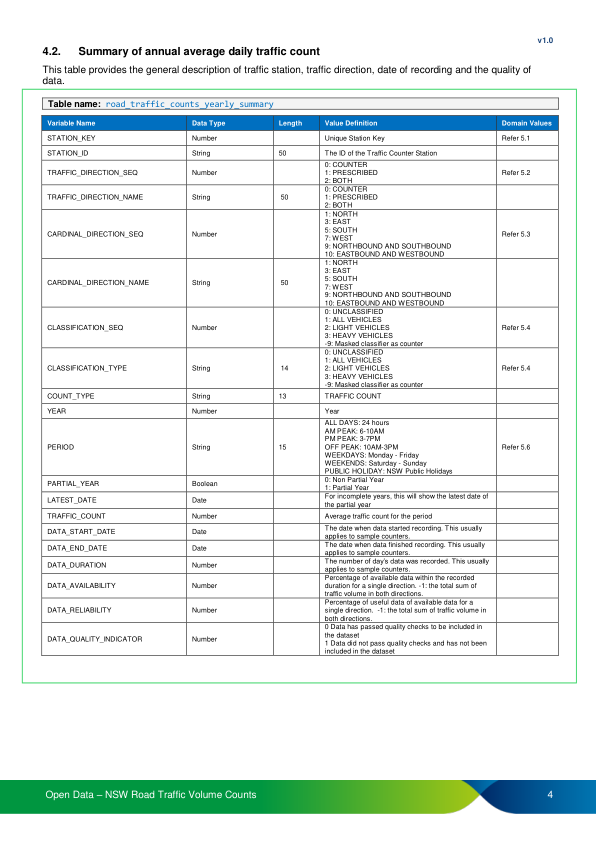

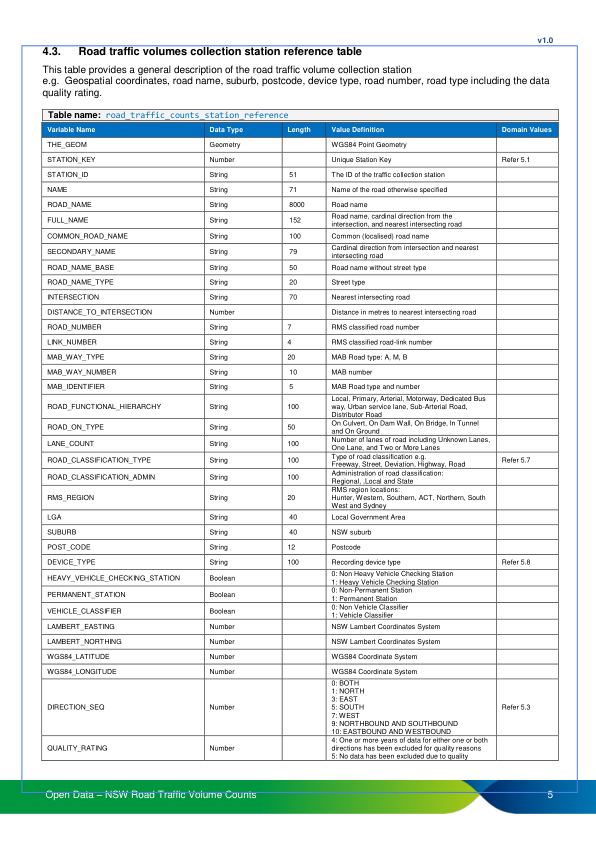

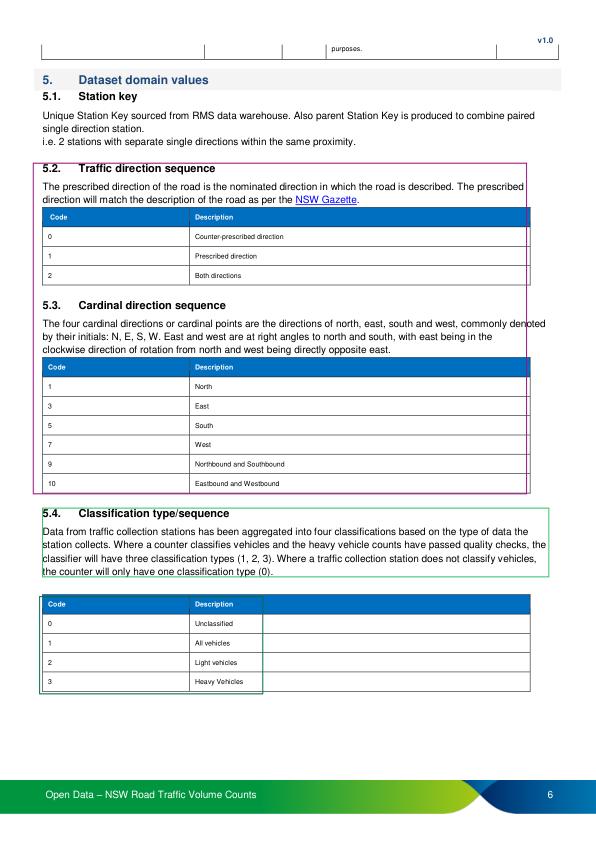

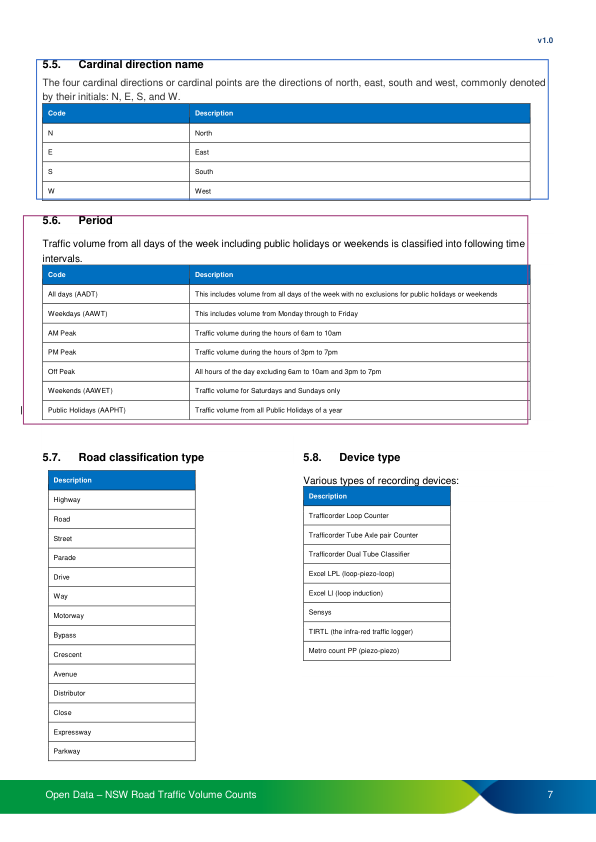

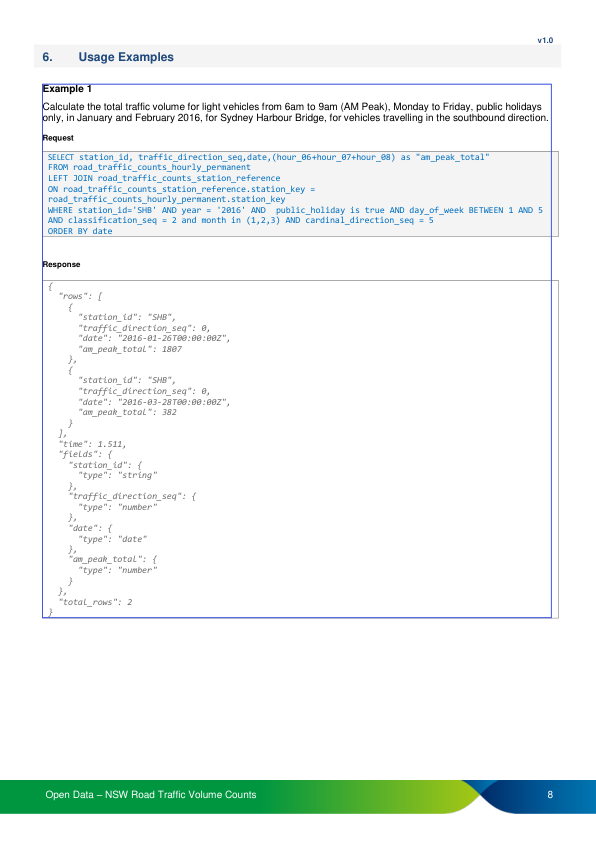

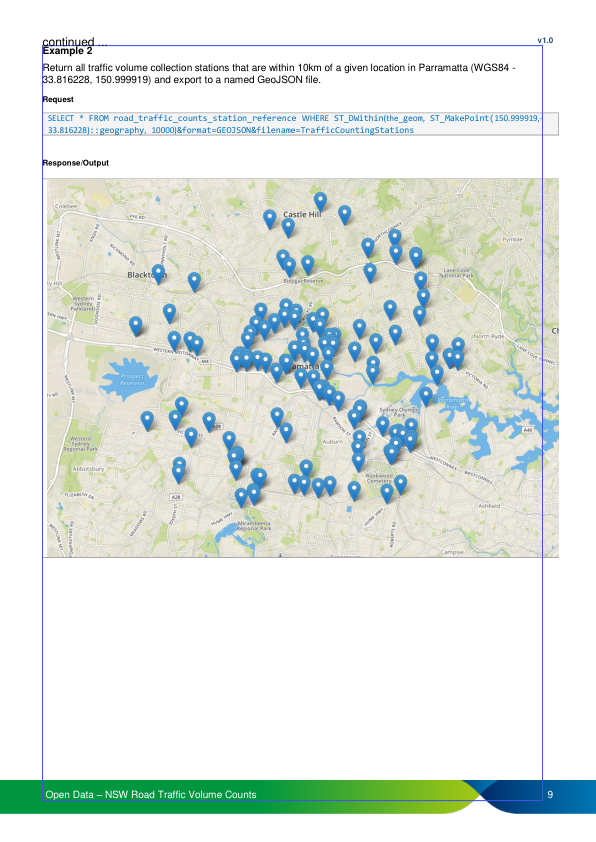

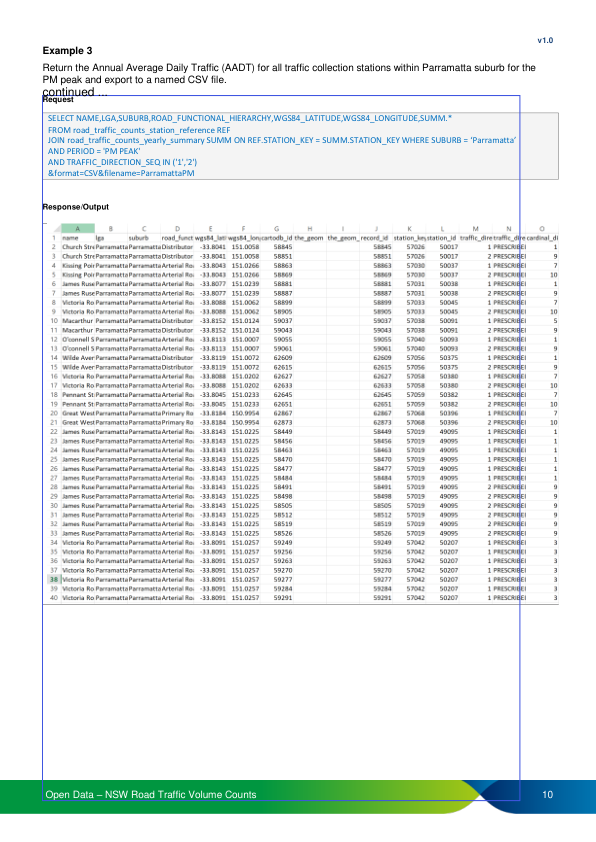

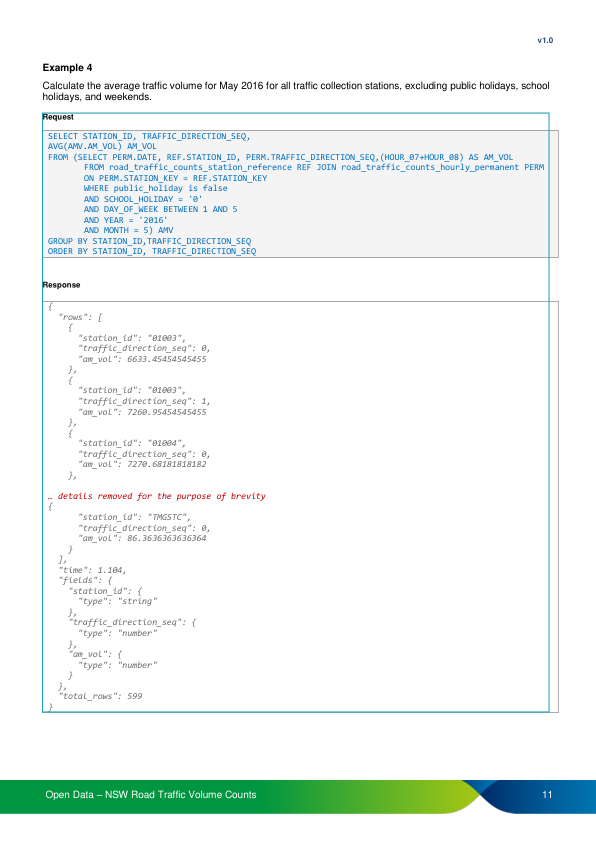

In [9]:
pdf = Pdf(doc_path)
pdf.display_with_bboxes(
    parsed_content.nodes,
)

In [10]:
parsed_content.nodes[0]

**3.2. How is data collected?**<br><br>Traffic volume information is collected via permanent and sample roadside traffic collection devices. <br><br>Roads and Maritime Services has approximately 600 permanent roadside collection device stations which 
continuously collect traffic information 365 days per year. There are also numerous sample roadside collection 
device stations across NSW, which collect information on a short term basis, usually over a two week period. <br><br>Information collected from these devices includes traffic volume counts, speed and classification (vehicle type) 
depending on the technology available at each site. 

In [19]:
display(Markdown(md(parsed_content.nodes[4].text)))


 
 




 [html]|Table name : road\_traffic\_counts\_vear1y\_sumary
|  |
| Variable Name | Data Type | Length | Value Definition | Domain Values |
| STATION\_KEY | Number |  | Unique Station Key | Refer 5.1 |
| STATION\_ID | String | 50 | The ID of the Traffic Counter Station |  |
| TRAFFIC\_DIRECTION\_SEQ | Number |  | 0 : COUNTER 1 : PRESCRIBED 2 : BOTH | Refer 5.2 |
| TRAFFIC\_DIRECTION\_NAME | String | 50 | 1 : PRESCRIBED2 : BOTH —— 1 : NORTH |  |
| CARDINAL\_DIRECTION\_SEQ | Number |  | 3 : EAST5 : SOUTH7 : WEST9 : NORTHROUND AND SOUTHROUNO10 : EASTBOUND AND WESTBOUND | Refer 5.3 |
| CARDINAL\_DIRECTION\_NAME | String | 50 | 1 : NGRTF63 : EAST5 : SOUTH7 : WESTH9 : NORTHBOUND AND SOUTHBOUNDUNDUNDUNDUNDUNDUSISISISISISISISISISISISISISISISISISISISISILISISIPIED |  |
| CLASSIFICATION\_SEQ | Number |  | 2 : LIGHT VEHICLES3 : HEAVY VEHICLES - 9 : Masked classifier as counter | Refer 5.4 |
| CLASSIFICATION\_TYPE | String | 14 | 1 : ALL VEHIGLES2 : LIGHT VEHICLES3 : HEAVY VEHICLES - 9 : Masked classifier as counter | Refer 5.4 |
| COUNT\_TYPE | String | 13 | TRAFFIC COUNT |  |
| YEAR | Number |  | Year |  |
| PERIOD | String | 15 | ALL DAYS : 24 hoursAM PEAK : 6 - 10AMOFF PEAK : 10AM 3PMWEEKDAYS : Monday - FrideyWEEKENENENENENS : Selurdey - SundayPLIB\_ICHOILIDAY : NSIN : Holday | Refer 5.6 |
| PARTIAL\_YEAR | Boolean |  | 0 : Non Partial Year 1 : Partial Year |  |
| LATEST\_DATE | Date |  | For incomplete years, this will show the latest date of the partial year |  |
| TRAFFIC\_COUNT | Number |  | Average traffic count for the period |  |
| DATA\_START\_DATE | Date |  | The date when data started recording. This usually gapEes. to sample. goutters. |  |
| DATA\_END\_DATE | Date |  | The date when data finished recording. This usually applies to sample counters. |  |
| DATA\_DURATION | Number |  | The number of day ’ s data was recorded. This usually applies to sample counters. Partners |  |
| DATA\_AVAILABILITY | Number |  | Percentage of available data within the recorded duration for a single direction. - 1 : the total sum of traffic volume in both directions. |  |
| DATA\_RELIABILITY | Number |  | Percentage of useful data of available data for a single direction. - 1 : the total sum of traffic volume in balb. diractions. |  |
| DATA\_QUALITY\_INDICATOR | Number |  | 0. Data has passed quality checks to be included in the dataset1. Data did not pess quality checks and has not been included in the dataset. |  |

  